In [7]:
import pandas as pd 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import os

<b> Objective </b> : Develop at least three insights and present your findings in the simplest way possible (correct visualization). Example of a good insight could be, showing that students have a much higher level stress when they are in prefinal or final year.


## Loading dataset

In [8]:
#importing csv file
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
df = pd.read_csv('Student Mental health.csv')

## Information about dataset

In [10]:
df.shape

(101, 11)

In [11]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [12]:
df.info

<bound method DataFrame.info of                Timestamp Choose your gender   Age What is your course?  \
0         8/7/2020 12:02             Female  18.0          Engineering   
1         8/7/2020 12:04               Male  21.0    Islamic education   
2         8/7/2020 12:05               Male  19.0                  BIT   
3         8/7/2020 12:06             Female  22.0                 Laws   
4         8/7/2020 12:13               Male  23.0         Mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
0          

In [13]:
df.head(5)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


## Data Preprocessing 

In [14]:
df1=df.dropna() #dropping null values

In [15]:
df1.shape

(100, 11)

In [16]:
#renaming column names
df1.rename(columns = {'Choose your gender':'gender',
                      'What is your course?':'course',
                      'Your current year of Study':'Year',
                      'What is your CGPA?':'CGPA',
                      'Do you have Depression?':'depression',
                      'Do you have Anxiety?':'anxiety',
                      'Do you have Panic attack?':'panic attack',
                      'Did you seek any specialist for a treatment?':'specialist treatment'}, inplace = True)
df1.head()

C:\Users\devan\AppData\Local\Temp\ipykernel_13964\2229342852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {'Choose your gender':'gender',


,Timestamp,gender,Age,course,Year,CGPA,Marital status,depression,anxiety,panic attack,specialist treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [17]:
#dropping timestamp column
df2= df1.drop(['Timestamp'],axis='columns')
df2.head()

,gender,Age,course,Year,CGPA,Marital status,depression,anxiety,panic attack,specialist treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [18]:
df2['Year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [19]:
df2['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [20]:
#removing whitespcae at beg and end in CGPA 
df2['CGPA']= df2['CGPA'].apply(lambda x: x.strip())

In [21]:
#converting float values in Age column to int
df2['Age'] = df2['Age'].astype(int) 

In [22]:
#make new column year with numeric values
df3 = df2.copy()
df3['year']= df2['Year'].apply(lambda x: int(x.split(' ')[1])) #creating new column year 
df3= df3.drop(['Year'],axis='columns')   # dropping old column Year
df3.head()

,gender,Age,course,CGPA,Marital status,depression,anxiety,panic attack,specialist treatment,year
0,Female,18,Engineering,3.00 - 3.49,No,Yes,No,Yes,No,1
1,Male,21,Islamic education,3.00 - 3.49,No,No,Yes,No,No,2
2,Male,19,BIT,3.00 - 3.49,No,Yes,Yes,Yes,No,1
3,Female,22,Laws,3.00 - 3.49,Yes,Yes,No,No,No,3
4,Male,23,Mathemathics,3.00 - 3.49,No,No,No,No,No,4


In [23]:
df3['Age'].unique()

array([18, 21, 19, 22, 23, 20, 24])

In [24]:
df3_male = df3[df3['gender']=='Male']
df3_male.head()

,gender,Age,course,CGPA,Marital status,depression,anxiety,panic attack,specialist treatment,year
1,Male,21,Islamic education,3.00 - 3.49,No,No,Yes,No,No,2
2,Male,19,BIT,3.00 - 3.49,No,Yes,Yes,Yes,No,1
4,Male,23,Mathemathics,3.00 - 3.49,No,No,No,No,No,4
5,Male,19,Engineering,3.50 - 4.00,No,No,No,Yes,No,2
9,Male,18,Irkhs,3.50 - 4.00,No,No,Yes,Yes,No,1


In [25]:
df3_male['Age'].unique()

array([21, 19, 23, 18, 24, 20])

In [26]:
df3_female = df3[df3['gender']=='Female']
df3_female.head()

,gender,Age,course,CGPA,Marital status,depression,anxiety,panic attack,specialist treatment,year
0,Female,18,Engineering,3.00 - 3.49,No,Yes,No,Yes,No,1
3,Female,22,Laws,3.00 - 3.49,Yes,Yes,No,No,No,3
6,Female,23,Pendidikan islam,3.50 - 4.00,Yes,Yes,No,Yes,No,2
7,Female,18,BCS,3.50 - 4.00,No,No,Yes,No,No,1
8,Female,19,Human Resources,2.50 - 2.99,No,No,No,No,No,2


In [27]:
df3_male['Age'].unique()

array([21, 19, 23, 18, 24, 20])

## Data Visualisation and Insights 

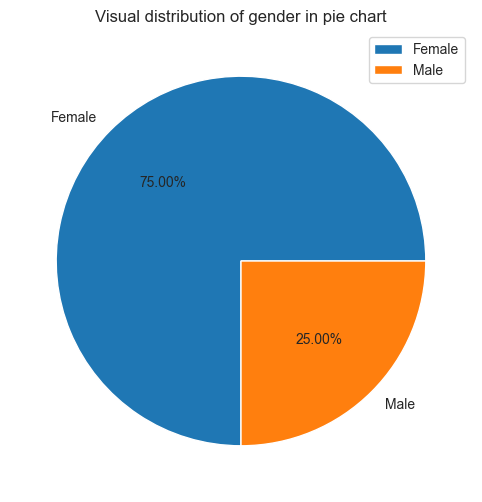

Number of male and female: 
 gender
Female    75
Male      25
Name: gender, dtype: int64


In [28]:
plt.figure(figsize=(12,6))
plt.title("Visual distribution of gender in pie chart")
g = plt.pie(df3['gender'].value_counts(),autopct='%1.2f%%', labels=df3['gender'].value_counts().index);
plt.legend()
plt.show()
print('Number of male and female: \n',df3.groupby('gender')['gender'].agg('count').sort_values(ascending=False))

From the pie chart we can infer that the ratio of female students to that of male students is 3:1.

Text(0.5, 1.0, 'Distribuition of panic attack among students agewise')

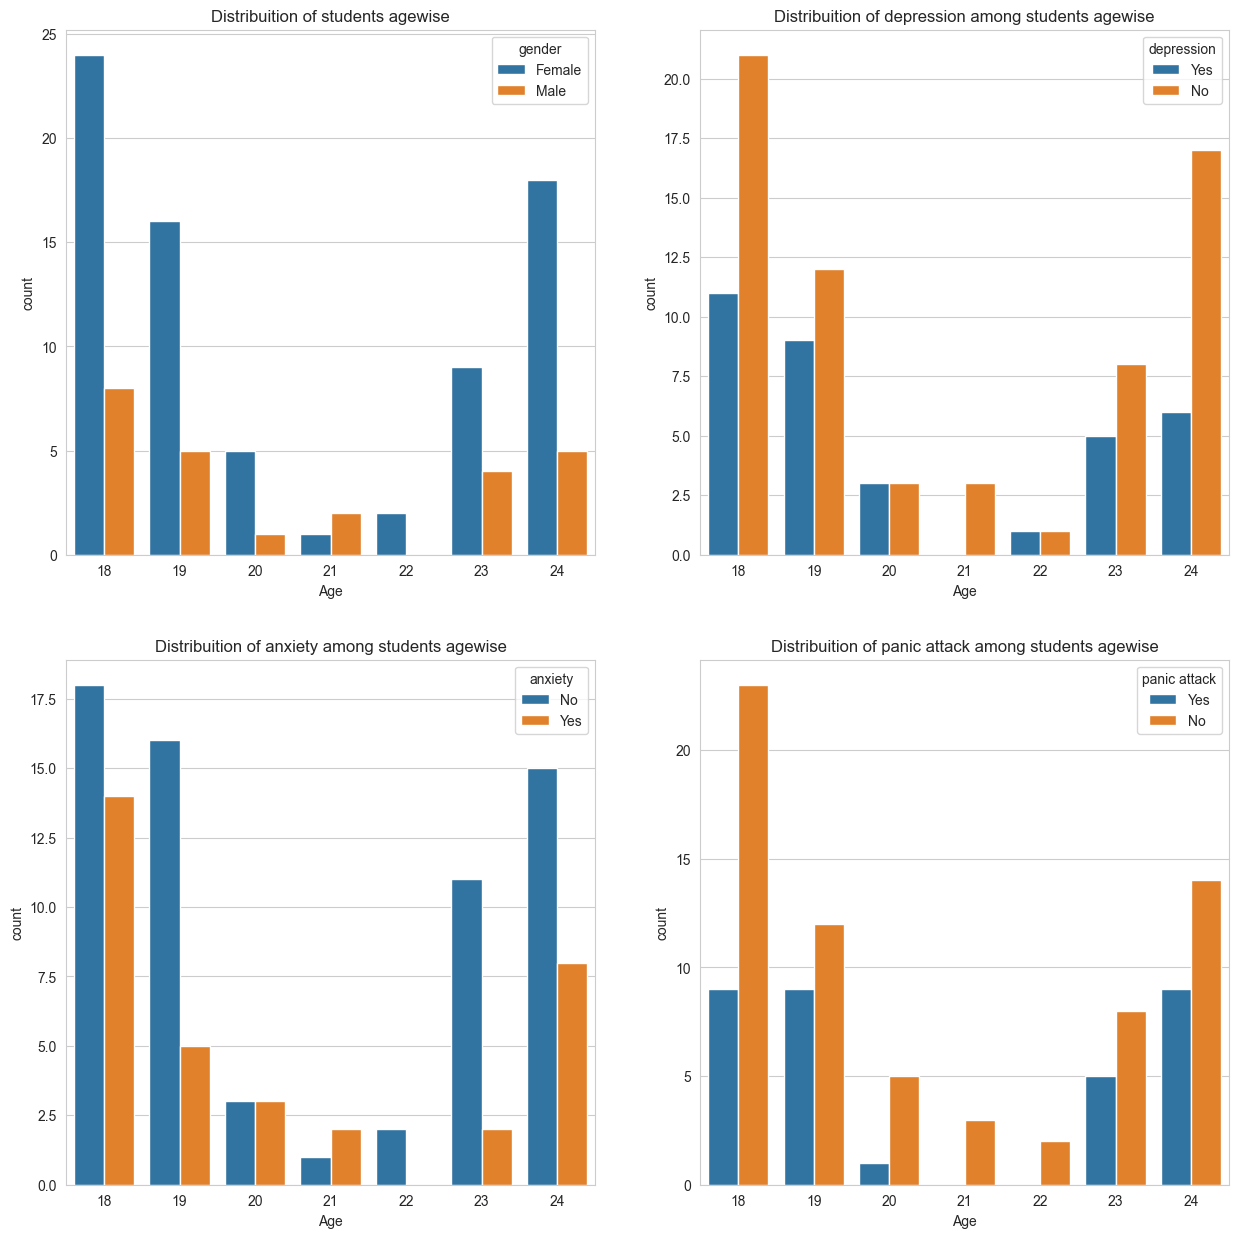

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
sns.countplot(data = df3,x='Age',hue='gender', ax=axes[0][0])
axes[0][0].set_title('Distribuition of students agewise')
sns.countplot(data=df3,x='Age',hue='depression', ax=axes[0][1])
axes[0][1].set_title('Distribuition of depression among students agewise')
sns.countplot(data=df3,x='Age',hue='anxiety', ax=axes[1][0])
axes[1][0].set_title('Distribuition of anxiety among students agewise')
sns.countplot(data=df3,x='Age',hue='panic attack', ax=axes[1][1])
axes[1][1].set_title('Distribuition of panic attack among students agewise')

From these graphs we can observe that - 
- Maximum number of students having depression are - 18 year old students, followed by 19, 24, 23, 20, 22 year old
- Maximum number of students having anxiety are - 18 year old students, followed by 24, 19, 20, 23, 21 year old
- Maximum number of students having panic attack are - 18 year old students, followed by 24, 19, 23, 20, 21, 22 year old

<br>We can conclude that, 18 year old are more prone to depression, anxiety and panic attacks and 21 year old are least prone.

Text(0.5, 1.0, 'Distribuition of panic attack among students yearwise')

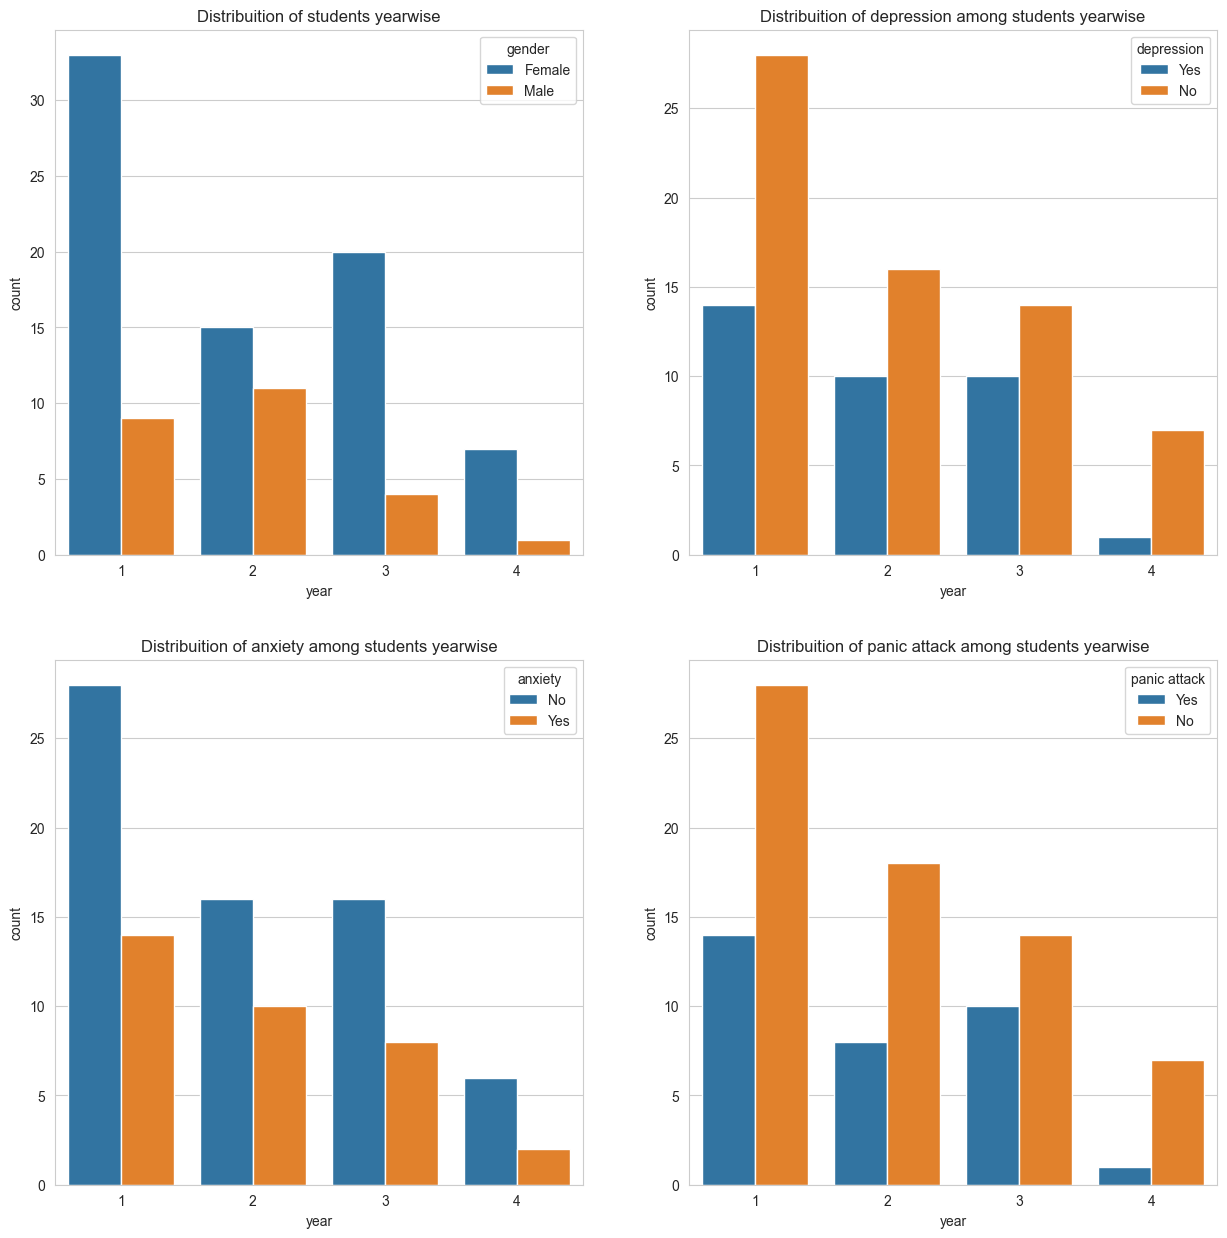

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
sns.countplot(data =df3, x='year',hue='gender', ax=axes[0][0])
axes[0][0].set_title('Distribuition of students yearwise')
sns.countplot(data=df3,x='year',hue='depression', ax=axes[0][1])
axes[0][1].set_title('Distribuition of depression among students yearwise')
sns.countplot(data=df3,x='year',hue='anxiety', ax=axes[1][0])
axes[1][0].set_title('Distribuition of anxiety among students yearwise')
sns.countplot(data=df3,x='year',hue='panic attack', ax=axes[1][1])
axes[1][1].set_title('Distribuition of panic attack among students yearwise')

    From these graphs we can observe that -
- 1st year students are most depressed, followed by 2nd, 3rd, and 4th.
- 1st year students are most anxious, followed by 2nd, 3rd, and 4th.
- 1st year students are more prone to panic attacks, followed by 3rd, 2nd, and 4th.

We can conclude that, maximum students are from 1st year and least from 4th year. 
1st year students are more prone to depression,axiety and panic attack,whereas 4th year students are less prone.

Text(0.5, 1.0, 'Distribuition of panic attack among students genderwise')

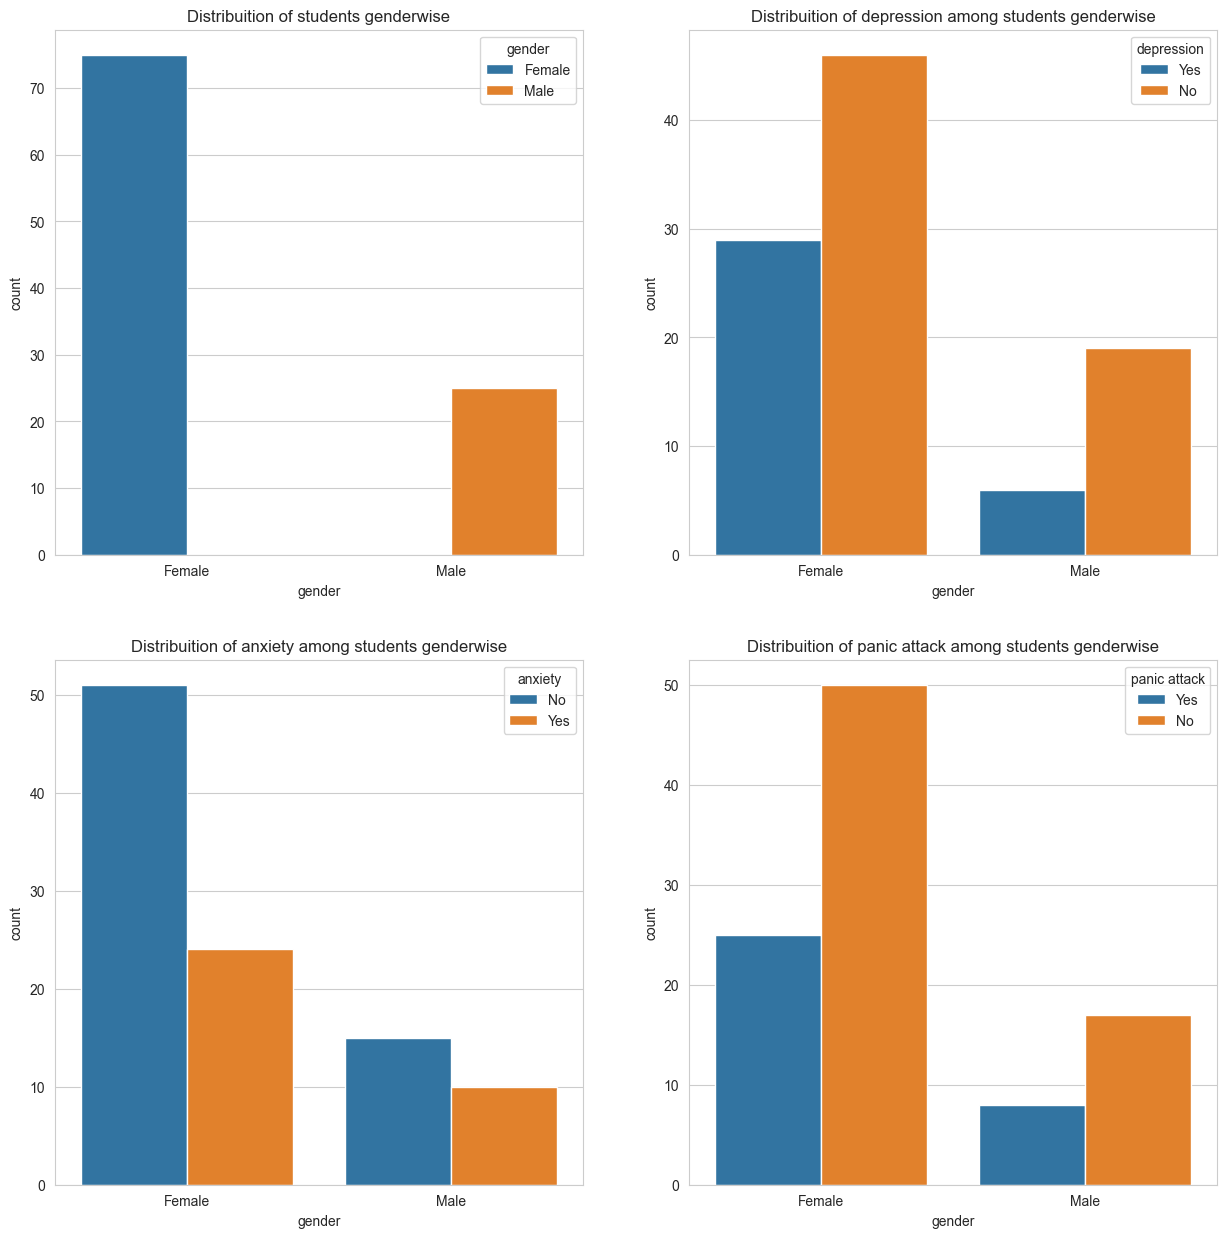

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
sns.countplot(data = df3,x='gender',hue='gender', ax=axes[0][0])
axes[0][0].set_title('Distribuition of students genderwise')
sns.countplot(data=df3,x='gender',hue='depression', ax=axes[0][1])
axes[0][1].set_title('Distribuition of depression among students genderwise')
sns.countplot(data=df3,x='gender',hue='anxiety', ax=axes[1][0])
axes[1][0].set_title('Distribuition of anxiety among students genderwise')
sns.countplot(data=df3,x='gender',hue='panic attack', ax=axes[1][1])
axes[1][1].set_title('Distribuition of panic attack among students genderwise')

From these graphs we can observe that - 
- Number of female students is greater than that of male students
- More than half of the female students have depression, but less than half of the male students have depression.
- More than half of the male students have anxiety, but less than half of the female students have anxiety.
- Male and female students are equally prone to panic attacks.

We can conclulde that, depression is more among female students, and anxiety is more among male students.

Text(0.5, 1.0, 'Distribuition of panic attack among students according to CGPA')

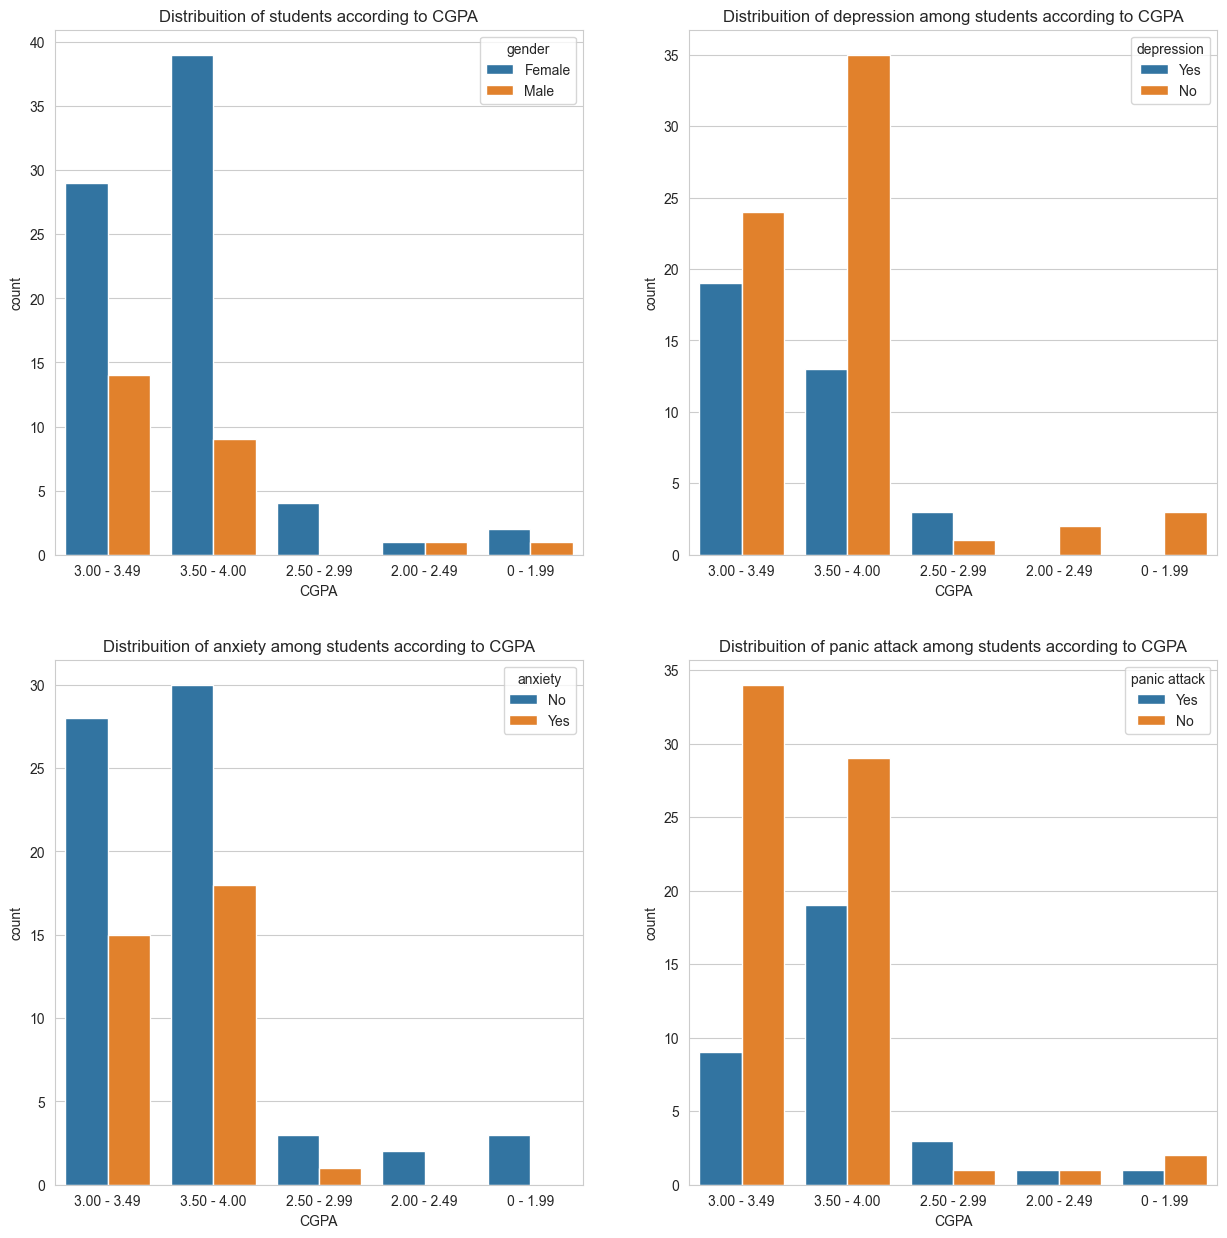

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
sns.countplot(data = df3,x='CGPA',hue='gender', ax=axes[0][0])
axes[0][0].set_title('Distribuition of students according to CGPA')
sns.countplot(data=df3,x='CGPA',hue='depression', ax=axes[0][1])
axes[0][1].set_title('Distribuition of depression among students according to CGPA')
sns.countplot(data=df3,x='CGPA',hue='anxiety', ax=axes[1][0])
axes[1][0].set_title('Distribuition of anxiety among students according to CGPA')
sns.countplot(data=df3,x='CGPA',hue='panic attack', ax=axes[1][1])
axes[1][1].set_title('Distribuition of panic attack among students according to CGPA')

From these graphs we can observe that - 
- more than half the students having CGPA of 3.00-3.49 have depression.
- maximum students facing anxiety have a CGPA of 3.50-4.00, followed by 3.00-3.49, and 2.50-2.99
- more than half of the students having CGPA of 3.50-4.00 have panic attacks.

We can conclude that, students with higher CGPA experience depression,anxiety, and panic attacks more compared to those with lesser CGPA.

In [33]:
depression_stats = df3.groupby('depression')['depression'].agg('count').sort_values(ascending=False)
anxiety_stats = df3.groupby('anxiety')['anxiety'].agg('count').sort_values(ascending=False)
panic_att_stats = df3.groupby('panic attack')['panic attack'].agg('count').sort_values(ascending=False)
treatment_stats = df3.groupby('specialist treatment')['specialist treatment'].agg('count').sort_values(ascending=False)
print(depression_stats,'\n\n',anxiety_stats,'\n\n',panic_att_stats,'\n\n',treatment_stats)

depression
No     65
Yes    35
Name: depression, dtype: int64 

 anxiety
No     66
Yes    34
Name: anxiety, dtype: int64 

 panic attack
No     67
Yes    33
Name: panic attack, dtype: int64 

 specialist treatment
No     94
Yes     6
Name: specialist treatment, dtype: int64


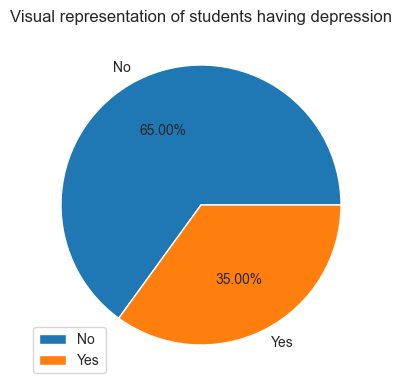

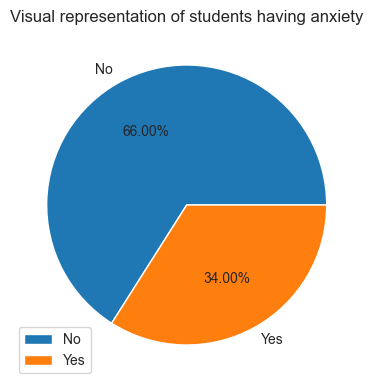

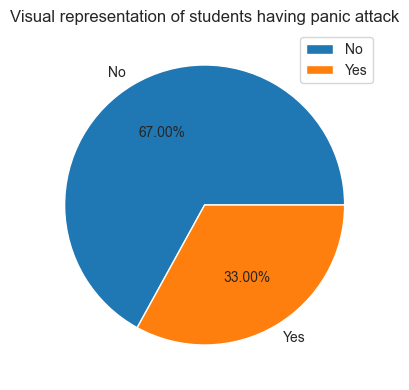

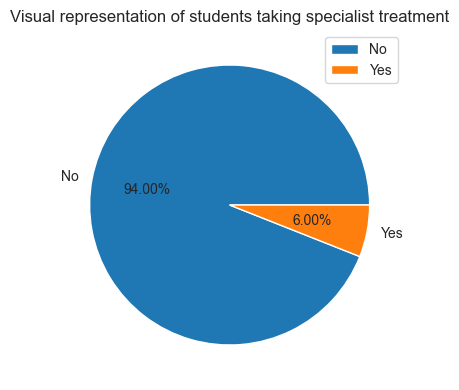

In [34]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(df3['depression'].value_counts(),autopct='%1.2f%%', labels=df3['depression'].value_counts().index);
plt.title('Visual representation of students having depression')
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(df3['anxiety'].value_counts(),autopct='%1.2f%%', labels=df3['anxiety'].value_counts().index);
plt.title('Visual representation of students having anxiety')
plt.legend()

plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(df3['panic attack'].value_counts(),autopct='%1.2f%%', labels=df3['panic attack'].value_counts().index);
plt.title('Visual representation of students having panic attack')
plt.legend()

plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(df3['specialist treatment'].value_counts(),autopct='%1.2f%%', labels=df3['specialist treatment'].value_counts().index);
plt.title('Visual representation of students taking specialist treatment')
plt.legend()

These pie charts show the percentage of students having depression, anxiety, panic attacks and those who have taken specialist treatment.

## Label Encoding 

In [35]:
#label encoding
df4=df3.copy()
df4.replace(('Yes','No'),(1,0),inplace=True)
df4.head()

,gender,Age,course,CGPA,Marital status,depression,anxiety,panic attack,specialist treatment,year
0,Female,18,Engineering,3.00 - 3.49,0,1,0,1,0,1
1,Male,21,Islamic education,3.00 - 3.49,0,0,1,0,0,2
2,Male,19,BIT,3.00 - 3.49,0,1,1,1,0,1
3,Female,22,Laws,3.00 - 3.49,1,1,0,0,0,3
4,Male,23,Mathemathics,3.00 - 3.49,0,0,0,0,0,4


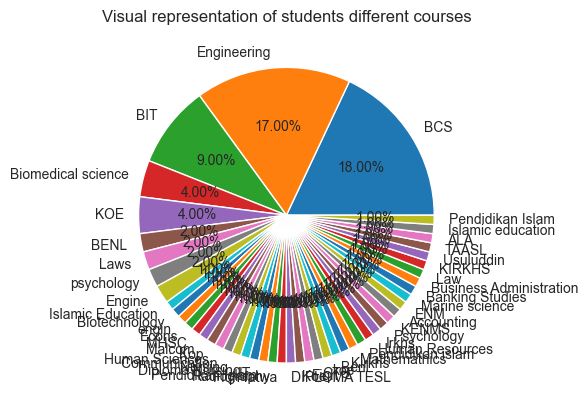

In [36]:
#pie chart showing students of different courses before dimentionality reduction
plt.pie(df4['course'].value_counts(),autopct='%1.2f%%', labels=df4['course'].value_counts().index);
plt.title('Visual representation of students different courses')
plt.show()

In [37]:
course_stats = df4.groupby('course')['course'].agg('count').sort_values(ascending=False)
course_stats

course
BCS                        18
Engineering                17
BIT                         9
Biomedical science          4
KOE                         4
psychology                  2
Engine                      2
BENL                        2
Laws                        2
Koe                         1
Kop                         1
Law                         1
MHSC                        1
Malcom                      1
Marine science              1
Mathemathics                1
Pendidikan Islam            1
Nursing                     1
Pendidikan Islam            1
Pendidikan islam            1
Psychology                  1
Radiography                 1
TAASL                       1
Usuluddin                   1
engin                       1
koe                         1
Kirkhs                      1
ALA                         1
KIRKHS                      1
ENM                         1
Banking Studies             1
Benl                        1
Biotechnology               1
Bus

In [38]:
#creating category other for course
course_stats_less_than_4 = course_stats[course_stats<=4]
course_stats_less_than_4

course
Biomedical science         4
KOE                        4
psychology                 2
Engine                     2
BENL                       2
Laws                       2
Koe                        1
Kop                        1
Law                        1
MHSC                       1
Malcom                     1
Marine science             1
Mathemathics               1
Pendidikan Islam           1
Nursing                    1
Pendidikan Islam           1
Pendidikan islam           1
Psychology                 1
Radiography                1
TAASL                      1
Usuluddin                  1
engin                      1
koe                        1
Kirkhs                     1
ALA                        1
KIRKHS                     1
ENM                        1
Banking Studies            1
Benl                       1
Biotechnology              1
Business Administration    1
CTS                        1
Communication              1
DIPLOMA TESL               1
Diploma

In [39]:
df4.course = df4.course.apply(lambda x: 'other' if x in course_stats_less_than_4 else x) 

In [40]:
df4.head()

,gender,Age,course,CGPA,Marital status,depression,anxiety,panic attack,specialist treatment,year
0,Female,18,Engineering,3.00 - 3.49,0,1,0,1,0,1
1,Male,21,other,3.00 - 3.49,0,0,1,0,0,2
2,Male,19,BIT,3.00 - 3.49,0,1,1,1,0,1
3,Female,22,other,3.00 - 3.49,1,1,0,0,0,3
4,Male,23,other,3.00 - 3.49,0,0,0,0,0,4


In [41]:
#one hot encoding

#creating dummy variables
dummies = pd.get_dummies(df4.course)  
dummies.head()

,BCS,BIT,Engineering,other
0,0,0,1,0
1,0,0,0,1
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


In [42]:
#append dummy variable dataframe to main df
df5 = pd.concat([df4,dummies.drop('other',axis='columns')],axis='columns')
df5 = df5.drop('course',axis='columns')
df5.head()

,gender,Age,CGPA,Marital status,depression,anxiety,panic attack,specialist treatment,year,BCS,BIT,Engineering
0,Female,18,3.00 - 3.49,0,1,0,1,0,1,0,0,1
1,Male,21,3.00 - 3.49,0,0,1,0,0,2,0,0,0
2,Male,19,3.00 - 3.49,0,1,1,1,0,1,0,1,0
3,Female,22,3.00 - 3.49,1,1,0,0,0,3,0,0,0
4,Male,23,3.00 - 3.49,0,0,0,0,0,4,0,0,0


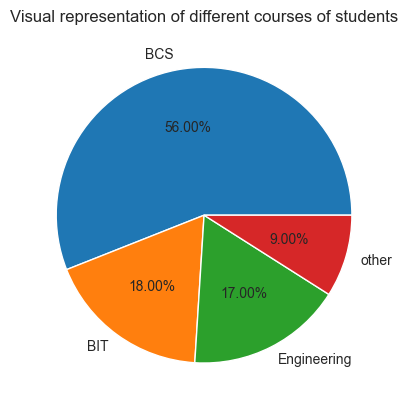

In [43]:
#plotting perecentage of students in various courses 
plt.pie(dummies.value_counts(),autopct='%1.2f%%', labels=dummies.columns)
plt.title('Visual representation of different courses of students')
plt.show()

## Conclusion 

- 18 year old are more prone to depression, anxiety and panic attacks and 21 year old are the least prone.
- 1st year students are more prone to depression, anxiety and panic attacks, whereas 4th year students are less prone.
- Depression is more among female students, and anxiety is more among male students.
- Students with higher CGPA experience depression, anxiety, and panic attacks more often as compared to those with lesser CGPA.